In [1]:
import os
import re
import csv


# preapre CSV

In [2]:
results_path = "/Users/u7826985/Projects/Nvidia/results/AA_simulation"
output_csv = f"{results_path}/results.csv"

In [3]:
# Regex to capture the RESULT line
pattern = re.compile(
    r"\[RESULT\]\s*backend=(\w+)\s+taxa=(\d+)\s+sites=(\d+)\s+patterns=(\d+)\s+time=([\d\.e\+\-]+)s\s+likelihood=([\-.\deE]+)"
)


In [4]:
data = []

In [6]:
#read files in results_path


def read_files_in_directory(directory):
    files = os.listdir(directory)
    for file in files:
        if file.endswith('.txt'):
            print(f"Reading file: {file}")
            
            with open(f'{results_path}/{file}', 'r') as f:
                for line in f:
                    match = pattern.search(line)
                    if match:
                        
                        backend, taxa, sites, patterns, time, likelihood = match.groups()
                        if (file.split(".")[0].split("_")[-1] == "a100"):
                            backend += "_a100"
                        else:
                            backend += "_v100"
                        if taxa != "100":
                            continue
                        data.append([backend, taxa, sites, patterns, likelihood, time])

                        # Write to CSV
                        # with open(output_csv, 'w', newline='') as csvfile:
                        #     writer = csv.writer(csvfile)
                        #     writer.writerow(["backend", "taxa", "sites", "patterns", "likelihood", "time"])
                        #     writer.writerows(data)

    print(f"Extracted {len(data)} results to {output_csv}")



In [7]:
read_files_in_directory(results_path)

Reading file: output_AA_simulation_100000_optimize_openacc_a100.txt
Reading file: output_AA_simulation_1000000_optimize_openacc_a100.txt
Reading file: output_AA_simulation_100000_optimize_openacc.txt
Reading file: output_AA_simulation_10000_optimize_openacc.txt
Reading file: output_AA_simulation_1000_optimize_openacc_a100.txt
Reading file: output_AA_simulation_1000_optimize_openacc.txt
Reading file: output_AA_simulation_1000000_optimize_openacc.txt
Reading file: output_AA_simulation_10000_optimize_openacc_a100.txt
Extracted 8 results to /Users/u7826985/Projects/Nvidia/results/AA_simulation/results.csv


In [8]:
print(data)

[['OPENACC_a100', '100', '100000', '100000', '-11560652.384823139756918', '0.780263161000000'], ['OPENACC_a100', '100', '1000000', '1000000', '-115631632.803908675909042', '19.417112333999999'], ['OPENACC_v100', '100', '100000', '100000', '-11560652.384823139756918', '0.782788744000000'], ['OPENACC_v100', '100', '10000', '10000', '-1151284.802710433257744', '0.241892686000000'], ['OPENACC_a100', '100', '1000', '1000', '-115909.164319487550529', '0.834759315000000'], ['OPENACC_v100', '100', '1000', '1000', '-115909.164319487550529', '0.234354664000000'], ['OPENACC_v100', '100', '1000000', '1000000', '-115631632.803908675909042', '16.243363936000002'], ['OPENACC_a100', '100', '10000', '10000', '-1151284.802710433257744', '0.495875312000000']]


In [9]:
alignment_pattern = re.compile(r"Alignment has (\d+) sequences with (\d+) columns, (\d+) distinct patterns")
likelihood_pattern = re.compile(r"Initial log-likelihood:\s+([-0-9.]+).*?took ([0-9.]+) wall-clock sec")

# Data list
# data = []


In [10]:
# add iqtree results
iqtree_results_path = results_path

def read_iqtree_results(directory):
    files = os.listdir(directory)
    for file in files:
        if file.endswith('.log'):
            print(f"Reading IQ-TREE file: {file}")
            with open(f'{iqtree_results_path}/{file}', 'r') as f:
                content = f.read()
        
                # Extract alignment info
                aln_match = alignment_pattern.search(content)
                ll_match = likelihood_pattern.search(content)
                
                if aln_match and ll_match:
                    taxa = int(aln_match.group(1))
                    sites = int(aln_match.group(2))
                    patterns = int(aln_match.group(3))
                    likelihood = float(ll_match.group(1))
                    time = float(ll_match.group(2))
                    
                    data.append(["IQ-TREE_SIMD", taxa, sites, patterns, likelihood, time])



    print(f"Extracted {len(data)} IQ-TREE results to {output_csv}")

In [11]:
read_iqtree_results(iqtree_results_path)

Reading IQ-TREE file: output_AA_simulation_1000000_iqtree.log
Reading IQ-TREE file: output_AA_simulation_1000_iqtree.log
Reading IQ-TREE file: output_AA_simulation_10000_iqtree.log
Reading IQ-TREE file: output_AA_simulation_100000_iqtree.log
Extracted 12 IQ-TREE results to /Users/u7826985/Projects/Nvidia/results/AA_simulation/results.csv


In [12]:
print(data)

[['OPENACC_a100', '100', '100000', '100000', '-11560652.384823139756918', '0.780263161000000'], ['OPENACC_a100', '100', '1000000', '1000000', '-115631632.803908675909042', '19.417112333999999'], ['OPENACC_v100', '100', '100000', '100000', '-11560652.384823139756918', '0.782788744000000'], ['OPENACC_v100', '100', '10000', '10000', '-1151284.802710433257744', '0.241892686000000'], ['OPENACC_a100', '100', '1000', '1000', '-115909.164319487550529', '0.834759315000000'], ['OPENACC_v100', '100', '1000', '1000', '-115909.164319487550529', '0.234354664000000'], ['OPENACC_v100', '100', '1000000', '1000000', '-115631632.803908675909042', '16.243363936000002'], ['OPENACC_a100', '100', '10000', '10000', '-1151284.802710433257744', '0.495875312000000'], ['IQ-TREE_SIMD', 100, 1000000, 1000000, -115631632.804, 15.946], ['IQ-TREE_SIMD', 100, 1000, 1000, -115909.164, 0.014], ['IQ-TREE_SIMD', 100, 10000, 10000, -1151284.803, 0.14], ['IQ-TREE_SIMD', 100, 100000, 100000, -11560652.385, 1.439]]


In [13]:
# Write to CSV
with open(output_csv, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["backend", "taxa", "sites", "patterns", "likelihood", "time"])
    writer.writerows(data)

# Analysis of Results

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


In [15]:
# Read the CSV file into a DataFrame
df = pd.read_csv(output_csv)
# Display the first few rows of the DataFrame
df.head()

,backend,taxa,sites,patterns,likelihood,time
0,OPENACC_a100,100,100000,100000,-1.156065e+07,0.780263
1,OPENACC_a100,100,1000000,1000000,-1.156316e+08,19.417112
2,OPENACC_v100,100,100000,100000,-1.156065e+07,0.782789
3,OPENACC_v100,100,10000,10000,-1.151285e+06,0.241893
4,OPENACC_a100,100,1000,1000,-1.159092e+05,0.834759


In [23]:
df

,backend,taxa,sites,patterns,likelihood,time
0,OPENACC_a100,100,100000,100000,-1.156065e+07,0.780263
1,OPENACC_a100,100,1000000,1000000,-1.156316e+08,19.417112
2,OPENACC_v100,100,100000,100000,-1.156065e+07,0.782789
3,OPENACC_v100,100,10000,10000,-1.151285e+06,0.241893
4,OPENACC_a100,100,1000,1000,-1.159092e+05,0.834759
5,OPENACC_v100,100,1000,1000,-1.159092e+05,0.234355
6,OPENACC_v100,100,1000000,1000000,-1.156316e+08,16.243364
7,OPENACC_a100,100,10000,10000,-1.151285e+06,0.495875
8,IQ-TREE_SIMD,100,1000000,1000000,-1.156316e+08,15.946000
9,IQ-TREE_SIMD,100,1000,1000,-1.159092e+05,0.014000


In [17]:
groups = df.groupby('taxa')

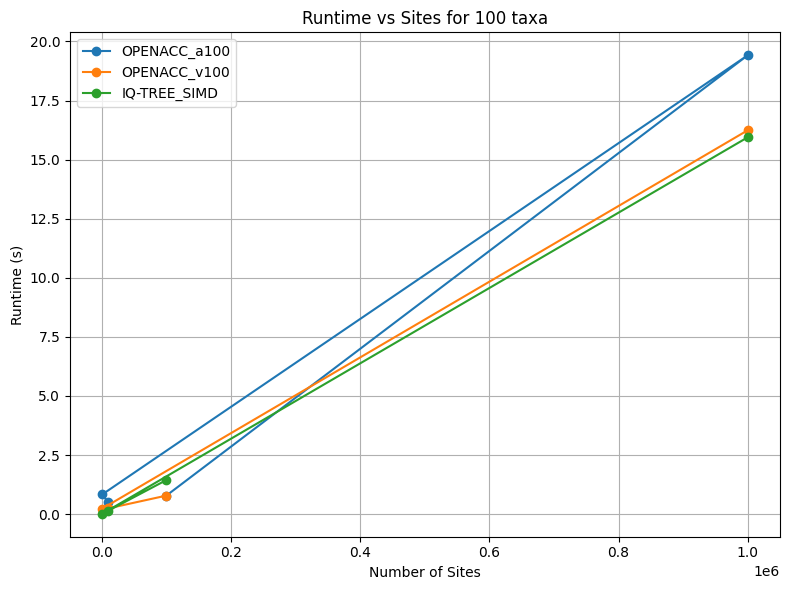

In [18]:
# Plot
plt.figure(figsize=(8,6))
for taxa, group in groups:
    if taxa != 100:
        continue
        
    for backend in group['backend'].unique():
        backend_data = group[group['backend'] == backend]
        plt.plot(
            backend_data['sites'],
            backend_data['time'],
            marker='o',
            label=f"{backend}"
        )

plt.xlabel('Number of Sites')
plt.ylabel('Runtime (s)')
plt.title('Runtime vs Sites for 100 taxa')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


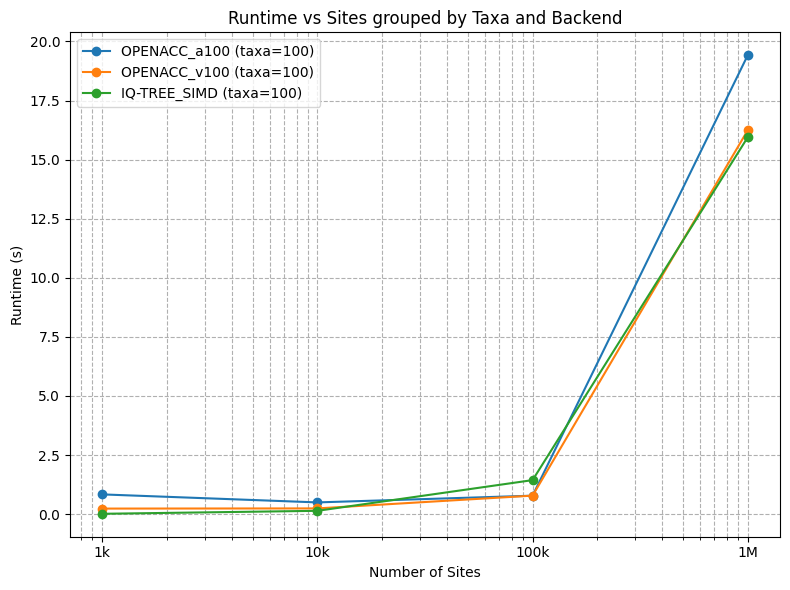

In [21]:
# Plot
plt.figure(figsize=(8,6))
for taxa, group in groups:
    if taxa != 100:
        continue
    for backend in group['backend'].unique():
        backend_data = group[group['backend'] == backend].sort_values("sites")
        plt.plot(
            backend_data['sites'],
            backend_data['time'],
            marker='o',
            label=f"{backend} (taxa={taxa})"
        )

plt.xlabel('Number of Sites')
plt.ylabel('Runtime (s)')
plt.title('Runtime vs Sites grouped by Taxa and Backend')
plt.legend()
plt.grid(True, which="both", ls="--")

# Use log scale for x-axis
plt.xscale('log')

# Set custom ticks for log scale
plt.xticks([1000, 10000, 100000, 1000000], 
           ['1k', '10k', '100k', '1M'])

plt.tight_layout()
plt.show()

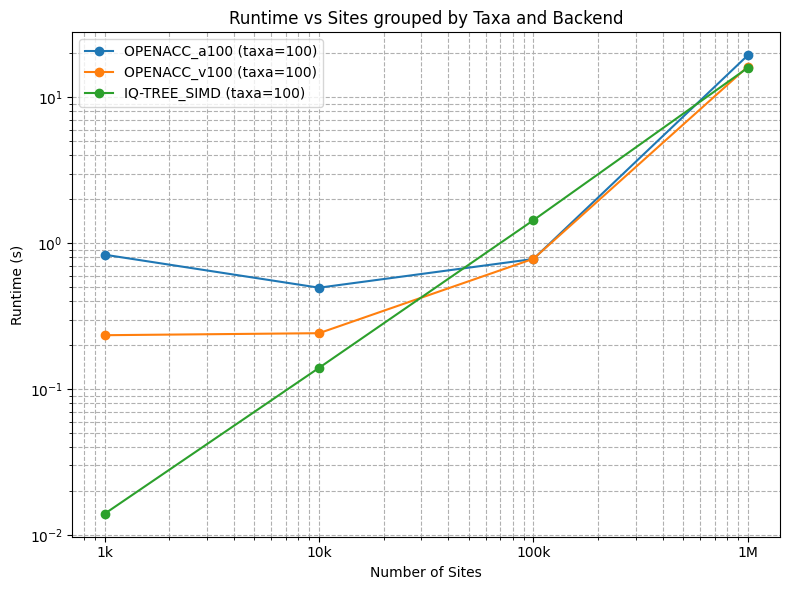

In [22]:
plt.figure(figsize=(8,6))

for taxa, group in groups:
    if taxa != 100:
        continue
    for backend in group['backend'].unique():
        backend_data = group[group['backend'] == backend].sort_values("sites")
        plt.plot(
            backend_data['sites'],
            backend_data['time'],
            marker='o',
            label=f"{backend} (taxa={taxa})"
        )

plt.xlabel('Number of Sites')
plt.ylabel('Runtime (s)')
plt.title('Runtime vs Sites grouped by Taxa and Backend')
plt.legend()
plt.grid(True, which="both", ls="--")

# Log scale for both axes
plt.xscale('log')
plt.yscale('log')

# Custom ticks for x-axis
plt.xticks([1000, 10000, 100000, 1000000], 
           ['1k', '10k', '100k', '1M'])

plt.tight_layout()
plt.show()
